<a href="https://colab.research.google.com/github/gvigkannan/Model_ADay/blob/Keras/ResNet_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np

## Importing and Processing Dataset!
 * Need to try out Data Augmentation and see the result!

In [ ]:
 (x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
 # For Feature Space
 x_train = x_train.astype('float32')/255
 x_test = x_test.astype('float32')/255

 # For Target Space
 y_train = keras.utils.to_categorical(y_train, num_classes = 10)
 y_test = keras.utils.to_categorical(y_test, num_classes = 10)

170500096/170498071 [==============================] - 3s 0us/step


In [ ]:
x_train[0].shape

(32, 32, 3)

In [ ]:
#train_test_split?

In [ ]:
# Creating a validation dataset
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train,
                                                  y_train,
                                                  test_size = 0.1)

In [ ]:
print(y_train.shape)
print(y_val.shape)

(45000, 10)
(5000, 10)


## Residual Module
* Filters = 32
* Dense = 1 x 64
* Train:
    * Loss:
    * Acc:
* Val:
    * Loss:
    * Acc:
* Test:
    * Loss:
    * Acc:

### Session 1


In [ ]:
def residual_module(layer_in, n_filters):
    # conv1
    y = layers.Conv2D(filters = n_filters, 
                          kernel_size = (3, 3),
                          padding = 'same')(layer_in)
    y = keras.layers.Activation('elu')(y)
    y = layers.BatchNormalization()(y)
    y = layers.Conv2D(filters = n_filters, 
                        kernel_size = (3, 3),
                        strides = (1, 1),
                        padding = 'same')(y)
    y = layers.BatchNormalization()(y)
    z = layers.Conv2D(filters = n_filters,
                      kernel_size = (1,1))(layer_in)
    x = layers.add([y, z])
    return keras.activations.elu(x)

In [ ]:
def ResNet():
    model_input = keras.Input(shape = (32,32,3))
    x = residual_module(layer_in = model_input,
                        n_filters = 32)
    x = keras.layers.MaxPool2D(pool_size=(2,2))(x)
    x = keras.layers.Flatten()(x)
    x = keras.layers.Dense(64)(x)
    x = keras.layers.Activation('elu')(x)
    x = keras.layers.Dropout(0.5)(x)
    x = keras.layers.Dense(10)(x)
    model_output = keras.layers.Activation('softmax')(x)
    return keras.Model(inputs = model_input, outputs = model_output)

In [ ]:
model_temp = ResNet()
model_temp.compile(loss = 'categorical_crossentropy',
                 optimizer = keras.optimizers.Adam(),
                 metrics = ['accuracy'])
model_temp.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_13 (Conv2D)              (None, 32, 32, 32)   896         input_8[0][0]                    
__________________________________________________________________________________________________
activation_2 (Activation)       (None, 32, 32, 32)   0           conv2d_13[0][0]                  
__________________________________________________________________________________________________
batch_normalization_8 (BatchNor (None, 32, 32, 32)   128         activation_2[0][0]               
____________________________________________________________________________________________

In [ ]:
my_callbacks = [keras.callbacks.ModelCheckpoint(filepath = 'ResNet_v1_acc_{val_accuracy:.2f}.hdf5',
                                                monitor = 'val_loss',
                                                mode = 'min',
                                                save_best_only = True,
                                                save_weights_only = True,
                                                verbose = 2),
                keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                              patience = 7,
                                              verbose = 2,
                                              restore_best_weights = True),
                keras.callbacks.ReduceLROnPlateau(factor = 0.5,
                                                  patience = 7)
                ]

In [ ]:
# Approx: 2min 48s per epoch! for C32, C64 and D64 and D16 - 166

history_temp = model_temp.fit(x_train, y_train, 
                              batch_size = 32,
                              epochs = 10,
                              validation_data = (x_val, y_val),
                              callbacks = my_callbacks)

Epoch 1/10
1407/1407 [==============================] - 166s 117ms/step - loss: 2.4462 - accuracy: 0.2483 - val_loss: 1.3792 - val_accuracy: 0.5042

Epoch 00001: val_loss improved from inf to 1.37925, saving model to CNN_C2D2_v4_acc_0.50.hdf5
Epoch 2/10
1407/1407 [==============================] - 166s 118ms/step - loss: 1.3895 - accuracy: 0.5062 - val_loss: 1.0826 - val_accuracy: 0.6110

Epoch 00002: val_loss improved from 1.37925 to 1.08260, saving model to CNN_C2D2_v4_acc_0.61.hdf5
Epoch 3/10
1407/1407 [==============================] - 166s 118ms/step - loss: 1.1869 - accuracy: 0.5855 - val_loss: 1.0810 - val_accuracy: 0.6162

Epoch 00003: val_loss improved from 1.08260 to 1.08098, saving model to CNN_C2D2_v4_acc_0.62.hdf5
Epoch 4/10
1407/1407 [==============================] - 167s 119ms/step - loss: 1.1038 - accuracy: 0.6134 - val_loss: 1.0440 - val_accuracy: 0.6308

Epoch 00004: val_loss improved from 1.08098 to 1.04402, saving model to CNN_C2D2_v4_acc_0.63.hdf5
Epoch 5/10
1407/

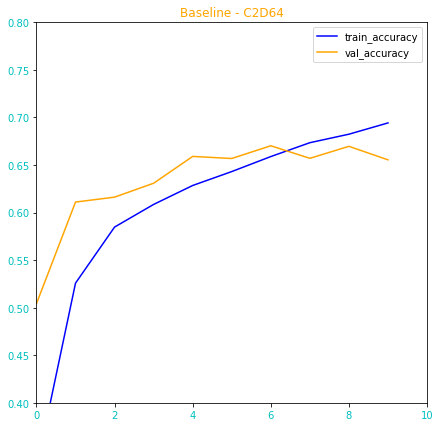

In [ ]:
history = history_temp.history
import matplotlib.pyplot as plt
plt.figure(figsize = (7,7))
plt.plot(history['accuracy'], c = 'b', label = 'train_accuracy')
plt.plot(history['val_accuracy'], c = 'orange' , label = 'val_accuracy')
plt.xticks(c = 'c')
plt.yticks(c = 'c')
plt.xlim([0, 10])
plt.ylim([0.4, 0.8])
plt.title('Baseline - C2D64', c = 'orange')
plt.legend()


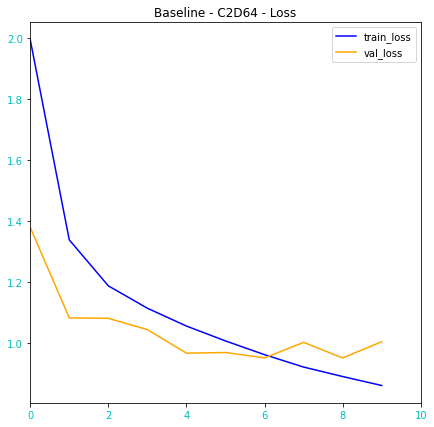

In [ ]:
plt.figure(figsize = (7,7))
plt.plot(history['loss'], c = 'b', label = 'train_loss')
plt.plot(history['val_loss'], c = 'orange' , label = 'val_loss')
plt.xticks(c = 'c')
plt.yticks(c = 'c')
plt.xlim([0, 10])
plt.title('Baseline - C2D64 - Loss')
plt.legend()

In [ ]:
model_temp.save('ResNet_v1_vacc_67.h5')

###  Session 2


In [ ]:
resnet_v1 = keras.models.load_model('ResNet_v1_vacc_67.h5')

In [ ]:
resnet_v1.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_13 (Conv2D)              (None, 32, 32, 32)   896         input_8[0][0]                    
__________________________________________________________________________________________________
activation_2 (Activation)       (None, 32, 32, 32)   0           conv2d_13[0][0]                  
__________________________________________________________________________________________________
batch_normalization_8 (BatchNor (None, 32, 32, 32)   128         activation_2[0][0]               
____________________________________________________________________________________________

In [ ]:
my_callbacks = [keras.callbacks.ModelCheckpoint(filepath = 'ResNet_v1_s1_acc_{val_accuracy:.2f}.hdf5',
                                                monitor = 'val_loss',
                                                mode = 'min',
                                                save_best_only = True,
                                                save_weights_only = True,
                                                verbose = 2),
                keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                              patience = 7,
                                              verbose = 2,
                                              restore_best_weights = True),
                keras.callbacks.ReduceLROnPlateau(factor = 0.5,
                                                  patience = 7)
                ]

In [ ]:
# Save your dataset splits! Otherwise, your model will be exposed to validation set!

In [ ]:
# Approx: 2min 48s per epoch! for C32, C64 and D64 and D16 - 166
# Session2: 197s
model_temp = resnet_v1
history_temp = model_temp.fit(x_train, y_train, 
                              batch_size = 32,
                              epochs = 10,
                              validation_data = (x_val, y_val),
                              callbacks = my_callbacks)

Epoch 1/10
1407/1407 [==============================] - 197s 139ms/step - loss: 0.8533 - accuracy: 0.6966 - val_loss: 0.6302 - val_accuracy: 0.7848

Epoch 00001: val_loss improved from inf to 0.63023, saving model to ResNet_v1_s1_acc_0.78.hdf5
Epoch 2/10
1407/1407 [==============================] - 195s 139ms/step - loss: 0.8251 - accuracy: 0.7066 - val_loss: 0.6922 - val_accuracy: 0.7544

Epoch 00002: val_loss did not improve from 0.63023
Epoch 3/10
1407/1407 [==============================] - 194s 138ms/step - loss: 0.7860 - accuracy: 0.7182 - val_loss: 0.7347 - val_accuracy: 0.7478

Epoch 00003: val_loss did not improve from 0.63023
Epoch 4/10
1407/1407 [==============================] - 197s 140ms/step - loss: 0.7682 - accuracy: 0.7247 - val_loss: 0.7105 - val_accuracy: 0.7498

Epoch 00004: val_loss did not improve from 0.63023
Epoch 5/10
1407/1407 [==============================] - 193s 137ms/step - loss: 0.7367 - accuracy: 0.7349 - val_loss: 0.7754 - val_accuracy: 0.7294

Epoch 0

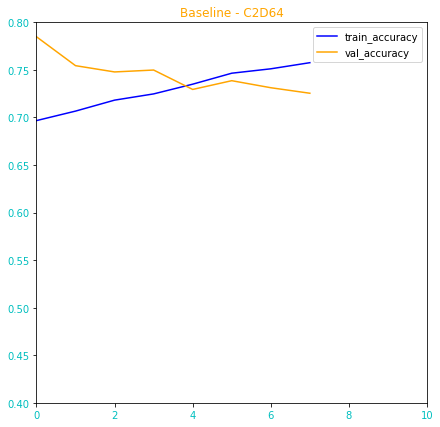

In [ ]:
history = history_temp.history
import matplotlib.pyplot as plt
plt.figure(figsize = (7,7))
plt.plot(history['accuracy'], c = 'b', label = 'train_accuracy')
plt.plot(history['val_accuracy'], c = 'orange' , label = 'val_accuracy')
plt.xticks(c = 'c')
plt.yticks(c = 'c')
plt.xlim([0, 10])
plt.ylim([0.4, 0.8])
plt.title('Baseline - C2D64', c = 'orange')
plt.legend()


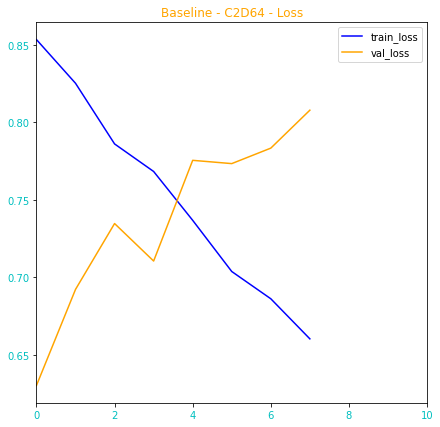

In [ ]:
plt.figure(figsize = (7,7))
plt.plot(history['loss'], c = 'b', label = 'train_loss')
plt.plot(history['val_loss'], c = 'orange' , label = 'val_loss')
plt.xticks(c = 'c')
plt.yticks(c = 'c')
plt.xlim([0, 10])
plt.title('Baseline - C2D64 - Loss', c = 'orange')
plt.legend()

In [ ]:
print(model_temp.evaluate(x_train, y_train))

1407/1407 [==============================] - 56s 40ms/step - loss: 0.5464 - accuracy: 0.8193
[0.5463967323303223, 0.8192889094352722]


In [ ]:
# This validation improvement is due to data leakage!
print(model_temp.evaluate(x_val, y_val))
print(model_temp.evaluate(x_test, y_test))

157/157 [==============================] - 6s 35ms/step - loss: 0.6302 - accuracy: 0.7848
[0.6302261352539062, 0.7847999930381775]
313/313 [==============================] - 11s 37ms/step - loss: 0.9688 - accuracy: 0.6774
[0.9687697291374207, 0.6773999929428101]
